# Lorenz attractor

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import logging

sys.path.append("../../")
from experiments.datasets import LorenzSimulator

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "experiments" not in key and "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)
        

## Generate data

In [2]:
sim = LorenzSimulator()

15:05 experiments.datasets.lorenz    INFO    Solving Lorenz system with parameters sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1. 1. 1.], for 10000000 time steps from 0 to 100.0


In [4]:
trajectory = sim.trajectory()

In [3]:
x = sim.sample(500)
# x = np.load("../data/samples/lorenz/x_train.npy")[:500]
# x = np.load("../data/samples/lorenz/x_test.npy")[:500]

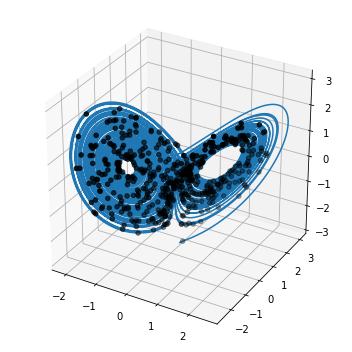

In [5]:
fig = plt.figure(figsize=(5,5))

ax = fig.gca(projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2])
ax.scatter(x[:,0], x[:,1], x[:,2], c="black")

plt.tight_layout()
plt.show()


In [7]:
np.min(trajectory)

-2.735349760095473